# Linear Regression

## Load a  data set

In [1]:
import pandas as pd
import sklearn.model_selection as ms #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn import linear_model #https://scikit-learn.org/stable/modules/linear_model.html
import sklearn.metrics as sklm #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

The data are available in a pre-processed form. The preprocessing includes the following:
1. Cleaning missing values.
2. Aggregate categories of certain categorical variables. 
3. Encoding categorical variables as binary dummy variables.
4. Standardization of numeric variables. 

Execute the code in the cell below to load the features and labels as numpy arrays for the example. 

In [2]:

Features = np.array(pd.read_csv('Auto_Data_Features.csv'))
Labels = np.array(pd.read_csv('Auto_Data_Labels.csv'))
print(Features.shape)
print(Labels.shape)

(195, 45)
(195, 1)


Notice that there are 195 cases and a total of 45 features. 

## Split the dataset

With the feature array loaded, you must now create randomly sampled training and test data sets. The code in the cell below uses the `train_test_split` function from the `sklearn.model_selection` module to Bernoulli sample the cases in the original dataset into the two subsets. Since this data set is small only 40 cases will be included in the test dataset. Execute this code. 

In [3]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 40)

x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

## A first linear regression model

To create a baseline for comparison, you will first create a model using all 45 features and no regularization. In the terminology used before this model has high variance and low bias. In otherwords, this model is overfit. 

The code in the cell below should be familiar. In summary, it performs the following processing:
1. Define and train the linear regression model using the training features and labels.
2. Score the model using the test feature set. 
3. Compute and display key performance metrics for the model using the test feature set. 


Execute this code and examine the results for the linear regression model. 

Mean Square Error      = 0.02103483180293395
Root Mean Square Error = 0.14503389880622375
Mean Absolute Error    = 0.11896679673181146
Median Absolute Error  = 0.09769580826159974
R^2                    = 0.9271178345990494


C:\Users\simku\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


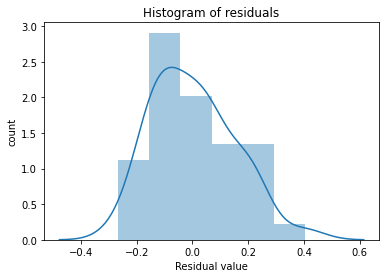

In [4]:
## define and fit the linear regression model
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
lin_mod = linear_model.LinearRegression()
lin_mod.fit(x_train, y_train)

def print_metrics(y_true, y_predicted):
    ## First compute R^2 and the adjusted R^2
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    r2 = sklm.r2_score(y_true, y_predicted)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    # R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.
    # https://statisticsbyjim.com/regression/interpret-r-squared-regression/
    print('R^2                    = ' + str(r2))
    


def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    # https://seaborn.pydata.org/generated/seaborn.distplot.html
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()
    

  

y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score) 
hist_resids(y_test, y_score)  


Overall these results are reasonably good. The error metrics are relatively small. Further, the distribution of the residuals is a bit skewed, but otherwise well behaved. 

In [5]:
lin_mod.coef_

array([ 0.02973923,  0.00080304,  0.0473526 ,  0.02219073,  0.14661907,
        0.22497784, -0.02383368, -0.02978523,  0.07981629, -0.06614906,
        0.04231192,  0.00344363, -0.01803326, -0.00421523, -0.02350706,
        0.04231192,  0.00344363, -0.01803326, -0.00421523, -0.02350706,
        0.04231192,  0.00344363, -0.01803326, -0.00421523, -0.02350706,
        0.04231192,  0.00344363, -0.01803326, -0.00421523, -0.02350706,
        0.04231192,  0.00344363, -0.01803326, -0.00421523, -0.02350706,
        0.04231192,  0.00344363, -0.01803326, -0.00421523, -0.02350706,
        0.04231192,  0.00344363, -0.01803326, -0.00421523, -0.02350706])

In [6]:
lin_mod.intercept_

9.414125032051723

<ipython-input-7-721928d47a18>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


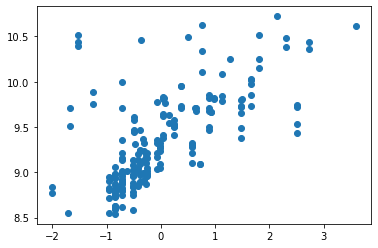

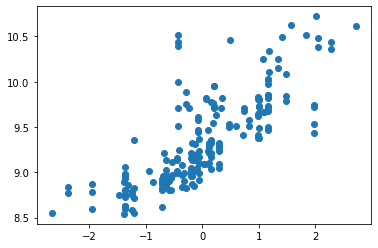

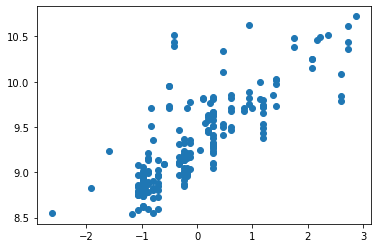

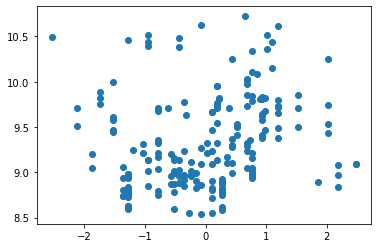

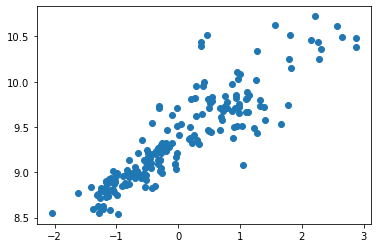

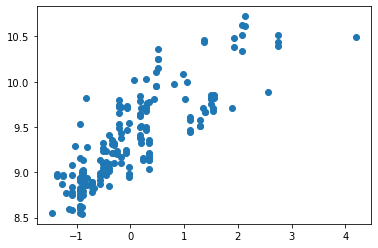

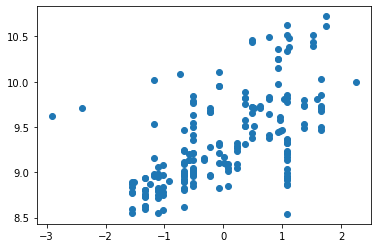

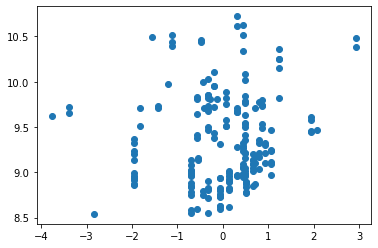

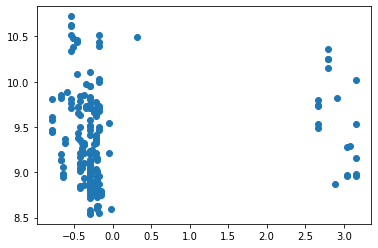

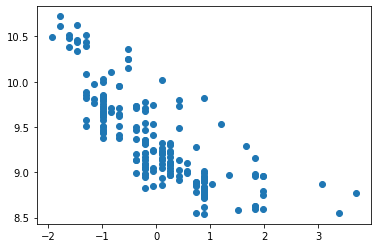

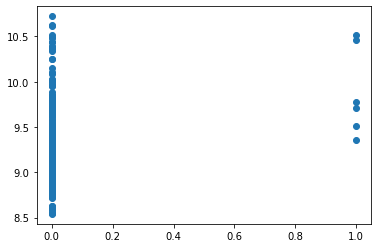

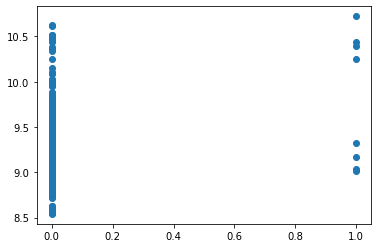

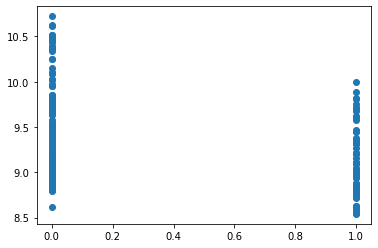

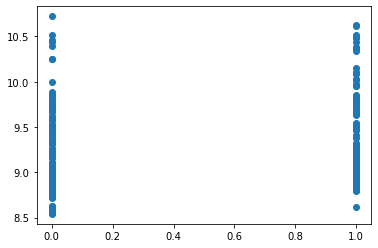

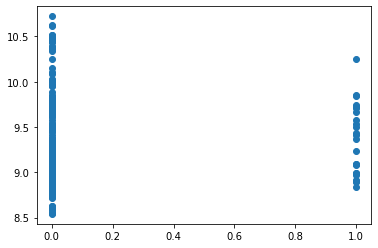

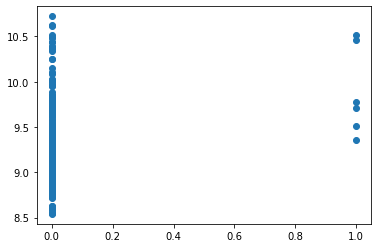

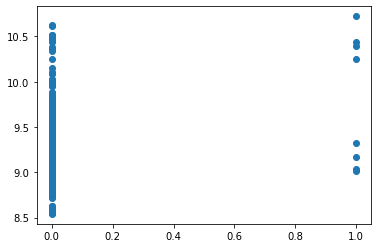

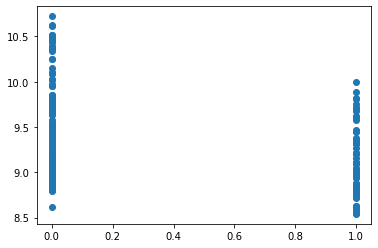

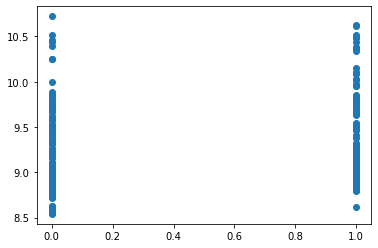

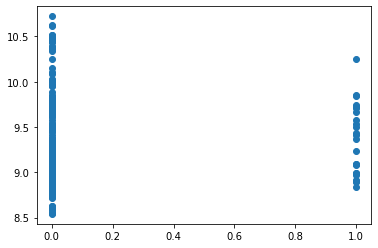

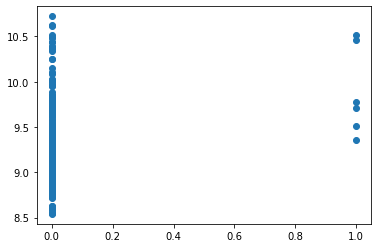

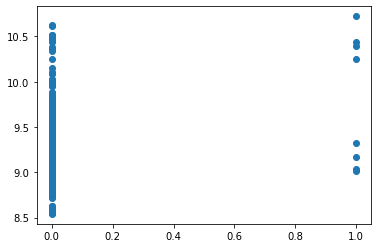

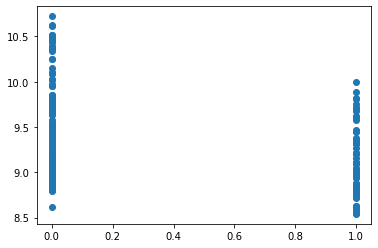

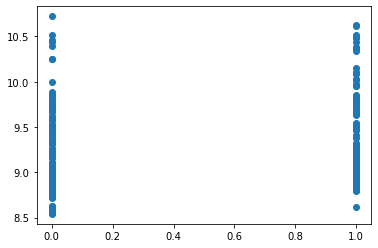

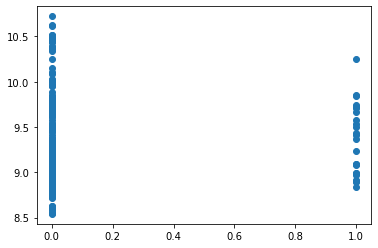

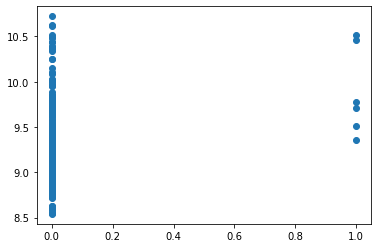

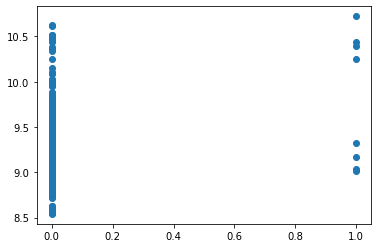

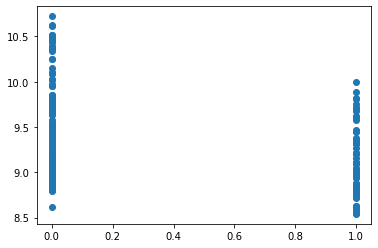

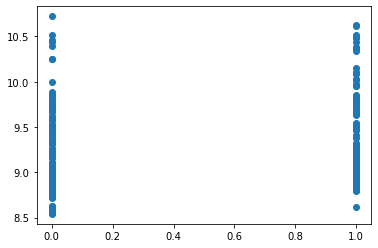

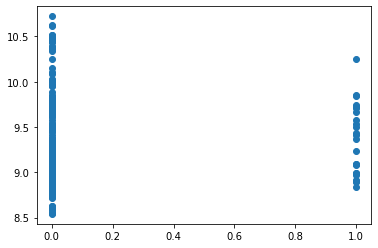

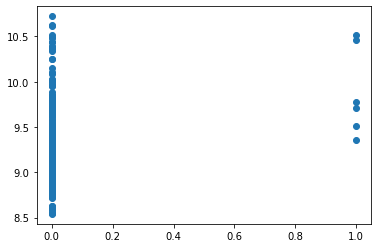

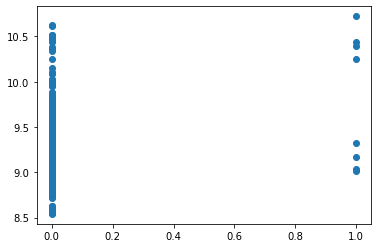

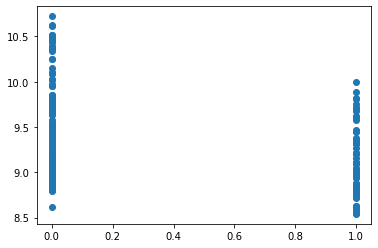

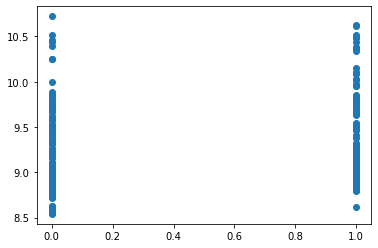

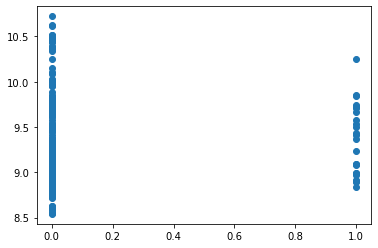

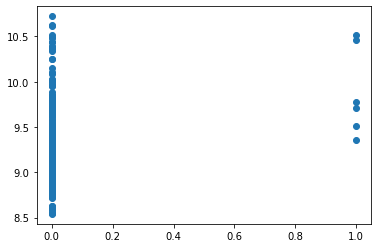

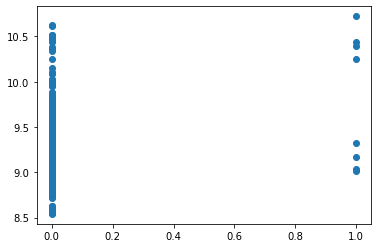

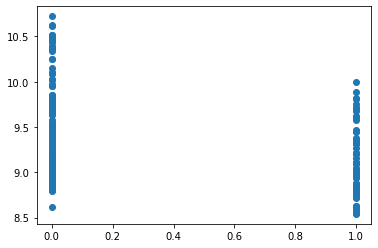

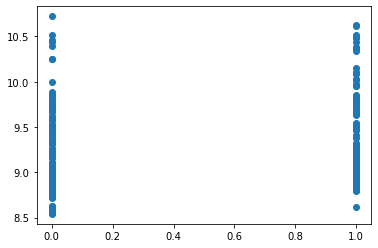

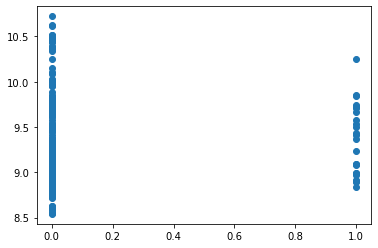

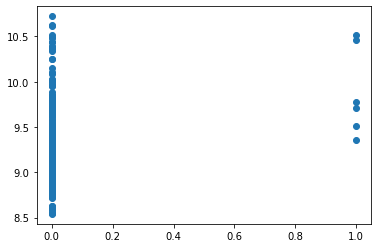

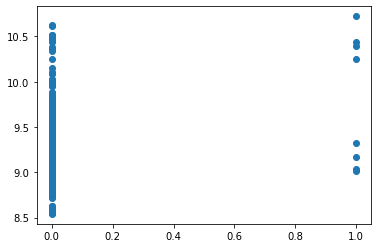

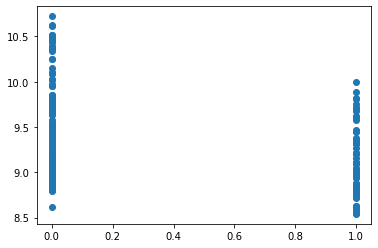

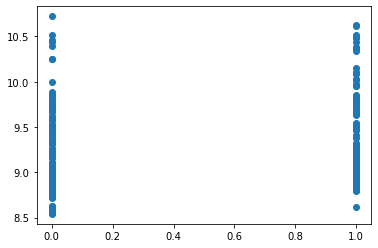

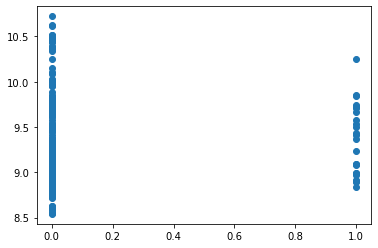

In [7]:
for i in range(Features.shape[1]):
    plt.figure()
    plt.scatter(Features[:,i],Labels)